In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from sklearn import metrics
import functions_4C as fn

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
X_train=np.load('imagettes4C_HSV_train.npy')
Y_train=np.load('YHSV_train.npy')

X_test=np.load('imagettes4C_HSV_test.npy')
Y_test=np.load('YHSV_test.npy')

In [3]:
#X_test=np.load('imagettes4C_HSV_test.npy')

Y_test=np.load('labels4C_HSV_test.npy')

## Avec 100 epochs HSV

In [6]:
lenet=fn.nn()
#seed(1)
#tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=2,verbose=0)

Instructions for updating:
Use tf.cast instead.


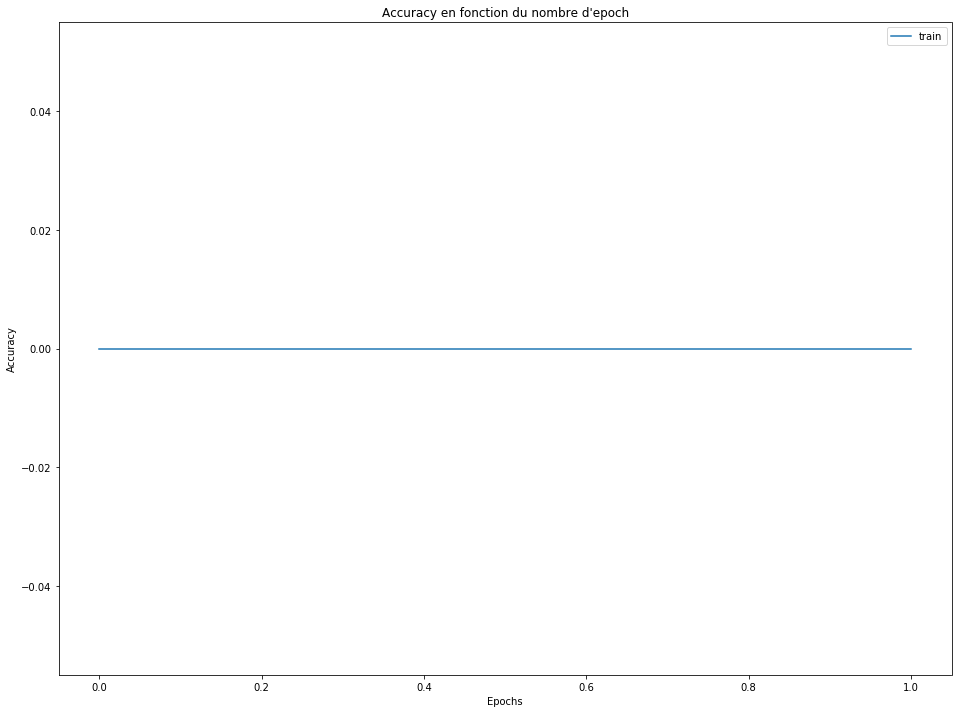

In [7]:
plt.figure(figsize=(16,12))

plt.plot(history.history['acc'],label="train");
#plt.plot(history.history['val_acc'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
#lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/100ep_HSV__6CL_4CH')

In [8]:
y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(y_predict,Y_test,digits=5))

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000         0
           1    0.00000   0.00000   0.00000         0
           4    0.00000   0.00000   0.00000         2

   micro avg    0.00000   0.00000   0.00000         2
   macro avg    0.00000   0.00000   0.00000         2
weighted avg    0.00000   0.00000   0.00000         2



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## 200 epochs HSV

In [121]:
lenet=fn.nn()
tensorflow.random.set_seed(2)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=200,verbose=1)

Train on 4228 samples, validate on 1057 samples
Epoch 1/200
4228/4228 [==============================] - 1s 322us/step - loss: 2.0363 - accuracy: 0.6135 - val_loss: 0.8918 - val_accuracy: 0.7133
Epoch 2/200
4228/4228 [==============================] - 1s 281us/step - loss: 1.1623 - accuracy: 0.6802 - val_loss: 0.7968 - val_accuracy: 0.7512
Epoch 3/200
4228/4228 [==============================] - 1s 285us/step - loss: 0.9677 - accuracy: 0.7171 - val_loss: 0.8212 - val_accuracy: 0.7304
Epoch 4/200
4228/4228 [==============================] - 1s 273us/step - loss: 1.0678 - accuracy: 0.7032 - val_loss: 0.9384 - val_accuracy: 0.7152
Epoch 5/200
4228/4228 [==============================] - 1s 285us/step - loss: 0.8358 - accuracy: 0.7502 - val_loss: 0.6722 - val_accuracy: 0.7881
Epoch 6/200
4228/4228 [==============================] - 1s 286us/step - loss: 0.7607 - accuracy: 0.7670 - val_loss: 0.8678 - val_accuracy: 0.7247
Epoch 7/200
4228/4228 [==============================] - 1s 277us/step

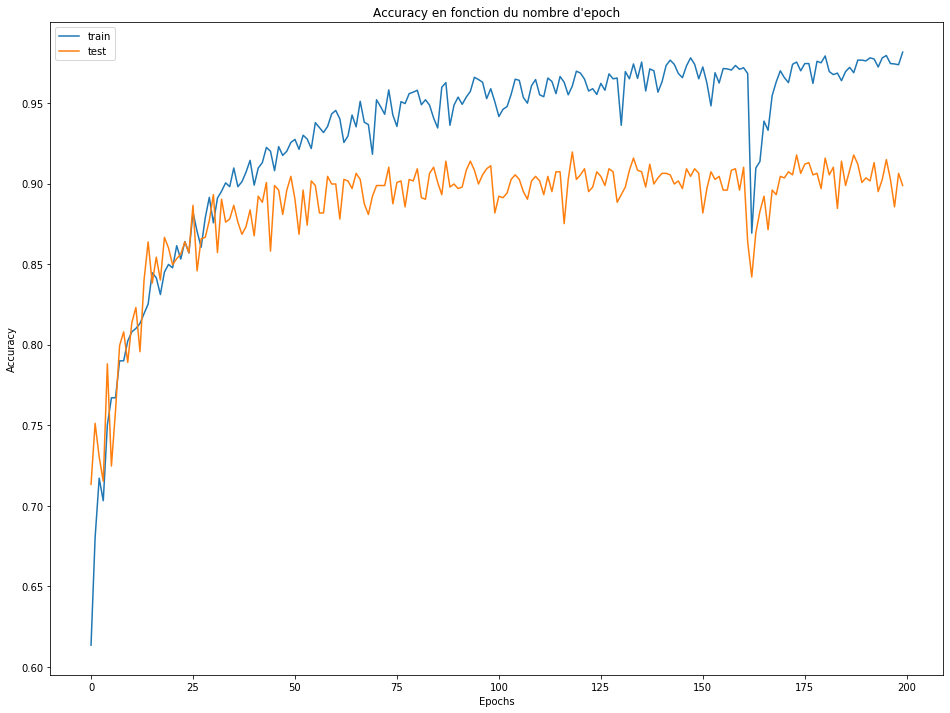

In [126]:
plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
lenet.save('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/200ep_6CL_4CH')

In [132]:
y_predict=lenet.predict(X_test).argmax(axis=1)
print(metrics.classification_report(y_predict,Y_test,digits=5))

              precision    recall  f1-score   support

           0    0.97869   0.91988   0.94837       649
           1    0.57692   0.62500   0.60000        24
           2    0.91371   0.91837   0.91603       196
           3    0.72308   0.75806   0.74016        62
           4    0.52941   0.66667   0.59016        27
           5    0.74400   0.93939   0.83036        99

    accuracy                        0.89877      1057
   macro avg    0.74430   0.80456   0.77085      1057
weighted avg    0.90907   0.89877   0.90205      1057

